## Simple ODE in $\mathcal{R}$


$$ \frac{d f}{d x} = 2 \pi \cos{[2 \pi x]}, \quad f(0)=0.5. $$

In [1]:
#Importing the required libraries
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import torch

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
#Defining the ODE
def ode(t, y):  
    return dde.grad.jacobian(y, t) - 2 * np.pi * torch.cos(2 * np.pi * t)

In [3]:
#Defining the geometry domain
geom = dde.geometry.TimeDomain(0, 1)
#Defining the initial condition
ic1 = dde.icbc.IC(geom, lambda x: 0.5, lambda _, on_initial: on_initial)
#Defining the data
data = dde.data.TimePDE(geom, ode, [ic1,], 16, 2, solution= lambda x: np.sin(2 * np.pi * x) + .5, num_test=500)


In [4]:

#Defining the neural network

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile(
    "adam", lr=0.02,
)
losshistory, train_state = model.train(iterations=4000)

Compiling model...
'compile' took 0.702592 s

Training model...

Step      Train loss              Test loss               Test metric
0         [2.14e+01, 2.50e-01]    [2.03e+01, 2.50e-01]    []  
1000      [2.61e-02, 4.34e-03]    [2.90e-02, 4.34e-03]    []  
2000      [2.86e-04, 5.49e-08]    [3.61e-04, 5.48e-08]    []  
3000      [3.52e-03, 2.39e-05]    [3.87e-03, 2.39e-05]    []  
4000      [6.14e-02, 3.21e-03]    [6.74e-02, 3.21e-03]    []  

Best model at step 2000:
  train loss: 2.86e-04
  test loss: 3.62e-04
  test metric: []

'train' took 19.576823 s



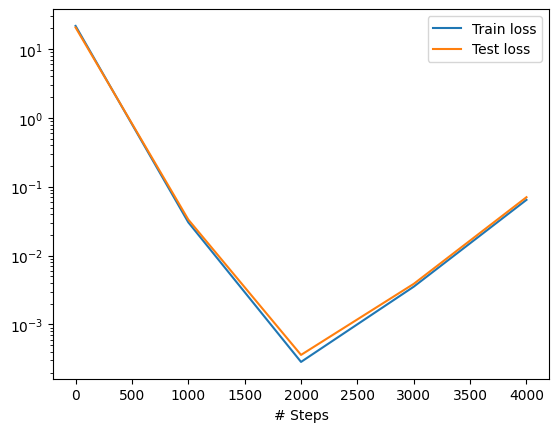

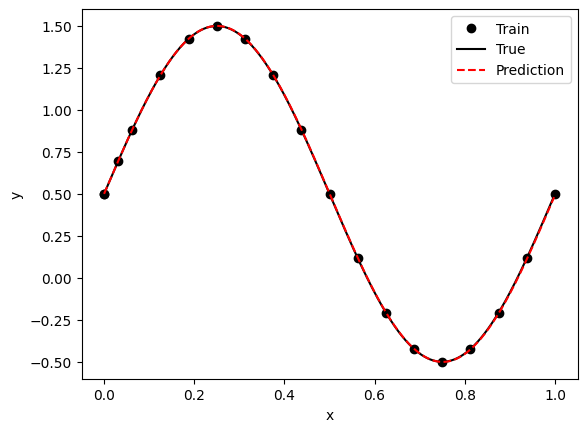

In [5]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)